In [1]:
import pandas as pd
import numpy as np
import os 
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())

#creating 2 columns to identify source file and if ios or android
df = pd.read_csv(root / "data" / "processed" / "merged" / "state1_clean.csv", header=0)
df.head()

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius
0,0,android_turns.csv,5.0,12.743101,3.173500,0.007654,1,15.306123,10.714942,13.421639,3.099853,17.929585,57.610783,23.959110
1,0,android_turns.csv,5.0,11.281634,2.737719,0.008573,1,19.387754,9.529365,10.491248,1.173136,11.777087,32.709633,9.324203
2,0,android_turns.csv,5.0,11.028114,3.967555,0.009012,1,16.836735,8.478003,14.696693,2.366215,22.094933,88.539480,3.087557
3,0,android_turns.csv,4.0,19.864027,5.356430,0.025984,1,20.663265,22.033857,18.588970,2.522688,16.592813,89.536600,12.669695
4,0,android_turns.csv,5.0,16.620464,5.078434,0.019170,1,19.387754,19.640330,18.141582,2.252747,18.612541,95.261020,10.121602


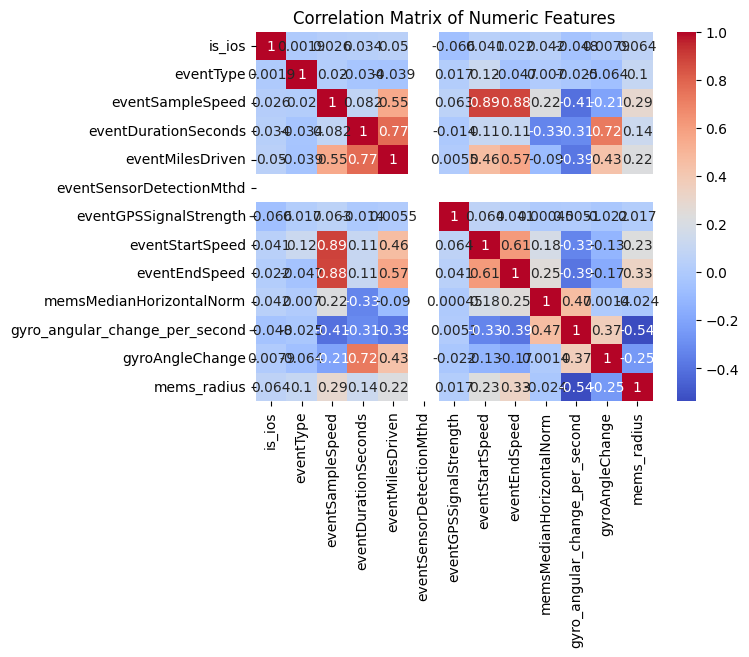

In [3]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlations
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

X = df.select_dtypes(include=['float64', 'int64'])
X = X.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
import matplotlib.pyplot as plt

k_vals = [r[0] for r in results]
sil_vals = [r[1] for r in results]
ch_vals = [r[2] for r in results]

plt.figure(figsize=(8,4))
plt.plot(k_vals, sil_vals, 'bo-', label='Silhouette')
plt.plot(k_vals, [c / max(ch_vals) for c in ch_vals], 'ro-', label='CH (normalized)')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score (normalized)")
plt.legend()
plt.title("Cluster Evaluation Metrics")
plt.show()

NameError: name 'results' is not defined

In [ ]:
best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

results = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)

    results.append((k, sil, ch))
    best_k = k if (len(results) == 0 or sil > results[-1][1]) else best_k

for r in results:
    print(f"k={r[0]} | Silhouette={r[1]:.3f} | CH Score={r[2]:.0f}")

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=best_k)
pca_data = pca.fit_transform(X_scaled)

df['pca1'], df['pca2'] = pca_data[:,0], pca_data[:,1]

sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title("Clusters (PCA projection)")
plt.show()

In [ ]:
df.groupby('cluster').mean(numeric_only=True).T